In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
class Perceptron:
    def __init__(self, eta=0.01, n_iters=100):
        self.eta = eta
        self.n_iters = n_iters
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for i in range(self.n_iters):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            if i%20 == 0:
                self.errors_.append(errors)

In [3]:
#load data
df = load_breast_cancer(as_frame=True).frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#all features are numerical
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

<AxesSubplot:>

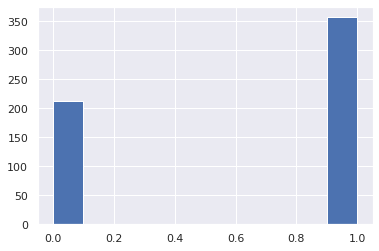

In [5]:
#target distribution
df['target'].hist()

In [6]:
#divide dataframe into data and targets
columns = df.columns.drop('target')
data = df.loc[:, columns]
target = df['target'].map({0: -1, 1: 1})
target.value_counts()

 1    357
-1    212
Name: target, dtype: int64

In [7]:
#standardize the data
sc = StandardScaler()
data_std = sc.fit_transform(data)

In [8]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_std, target, test_size=0.3, random_state=17)

#explore the shapes of attained arrays
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (398, 30)
X_test.shape: (171, 30)
y_train.shape: (398,)
y_test.shape: (171,)


In [9]:
#train Perceptron and print attained accuracies
clf = Perceptron(eta=0.005, n_iters=1000)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(f'Accuracy on train data: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy on test data: {accuracy_score(y_test, y_test_pred)}')

Accuracy on train data: 1.0
Accuracy on test data: 0.9532163742690059


Text(0.5, 1.0, 'Miscalssification analysis')

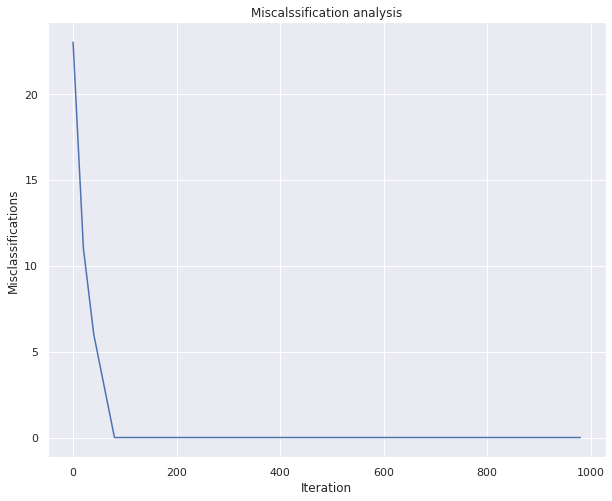

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(range(0, len(clf.errors_)*20, 20), clf.errors_)
plt.xlabel('Iteration')
plt.ylabel('Misclassifications')
plt.title('Miscalssification analysis')

<AxesSubplot:>

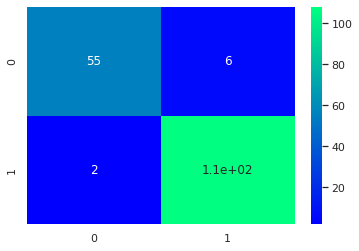

In [11]:
#build confusion matrix
conf_matr = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matr, cmap='winter', annot=True, cbar=True)

In [12]:
print(classification_report(y_test, y_test_pred, target_names=['Malignant', 'Benign']))

              precision    recall  f1-score   support

   Malignant       0.96      0.90      0.93        61
      Benign       0.95      0.98      0.96       110

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

